In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import librosa
import librosa.display
import IPython.display as ipd
import cv2
import sklearn

F:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


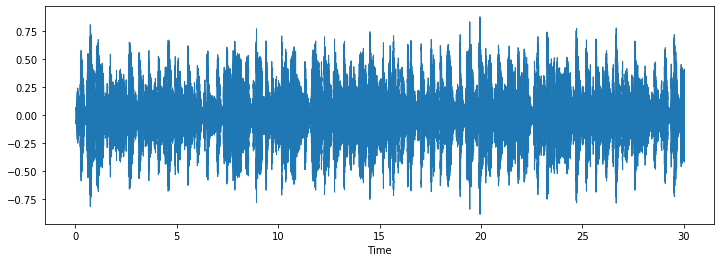

In [4]:
filename = 'Data/genres_original/blues/blues.00000.wav'
y, sr= librosa.load('Data/genres_original/blues/blues.00000.wav')
plt.figure(figsize=(12,4))
librosa.display.waveshow(y,sr=sr)
ipd.Audio(filename)

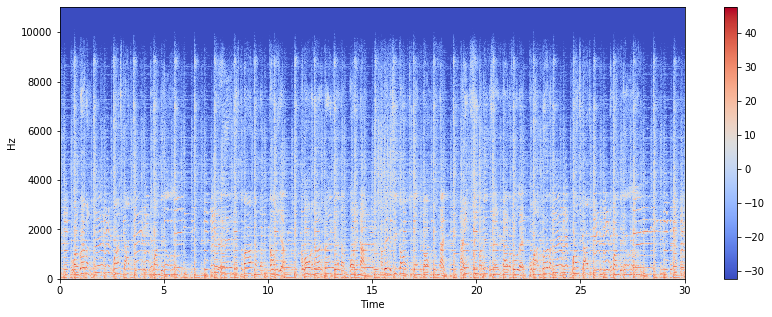

In [5]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

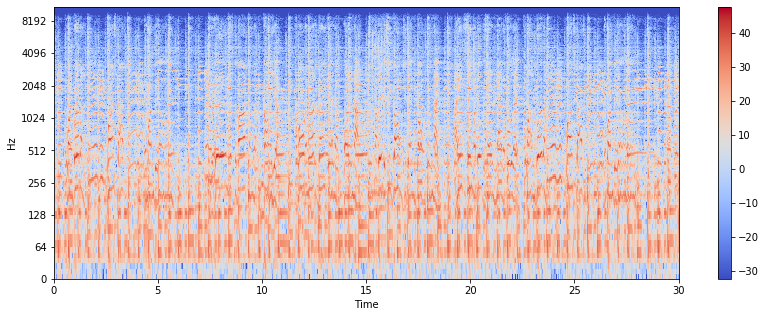

In [6]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Pass y=[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  This is separate from the ipykernel package so we can avoid doing imports until


Spectral Centroid shape:  (1293,)


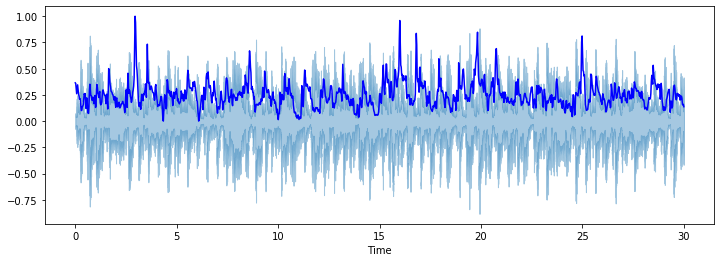

In [7]:
# Spectral Centroids

spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]
print("Spectral Centroid shape: ",spectral_centroids.shape)

plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Pass y=[ 0.01732422  0.02660156  0.01762939 ... -0.04560303 -0.05106568
 -0.05417847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  This is separate from the ipykernel package so we can avoid doing imports until


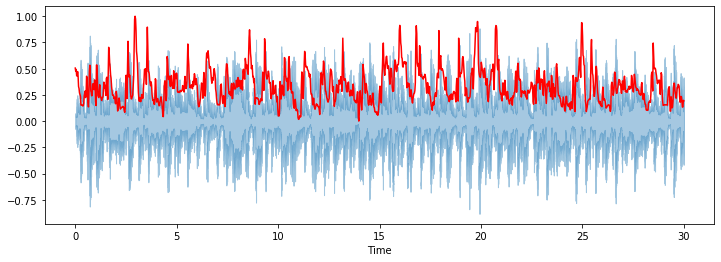

In [8]:
# Spectral Rolloff

spectral_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Pass y=[ 0.01732422  0.02660156  0.01762939 ... -0.04560303 -0.05106568
 -0.05417847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  This is separate from the ipykernel package so we can avoid doing imports until
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Pass y=[ 0.01732422  0.02660156  0.01762939 ... -0.04560303 -0.05106568
 -0.05417847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  after removing the cwd from sys.path.
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Pass y=[ 0.01732422  0.02660156  0.01762939 ... -0.04560303 -0.05106568
 -0.05417847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """


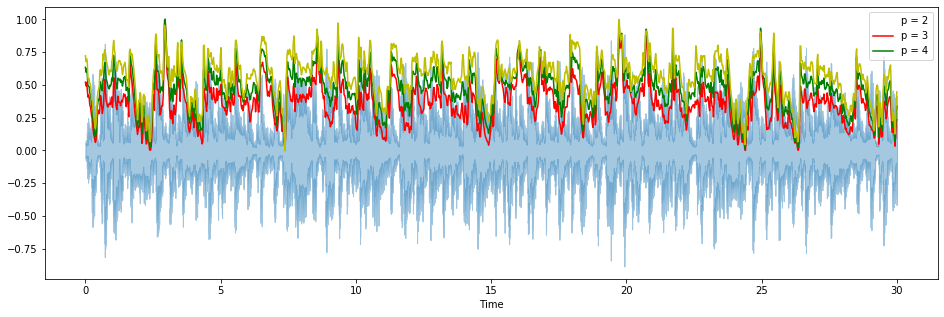

In [9]:
# Spectral Bandwidth

spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(16,5))
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Pass y=[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  This is separate from the ipykernel package so we can avoid doing imports until


MFCC shape:  (20, 1293)


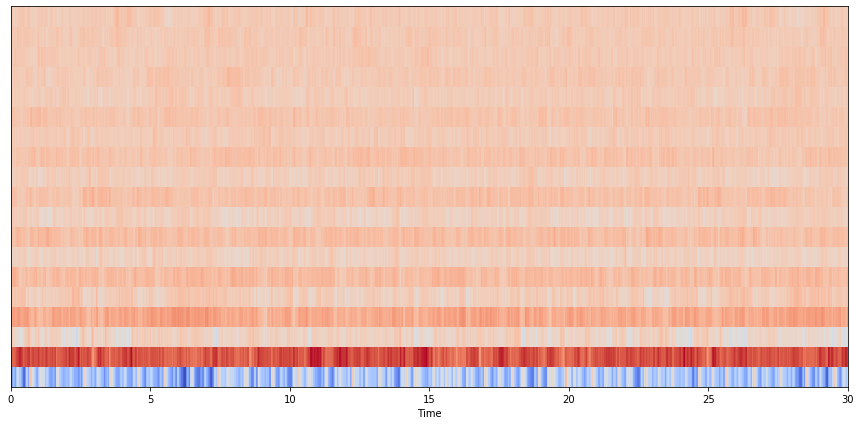

In [10]:
# Mel Frequency Cepstral coefficients

mfccs = librosa.feature.mfcc(y, sr=sr)
print("MFCC shape: ",mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Pass y=[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  This is separate from the ipykernel package so we can avoid doing imports until


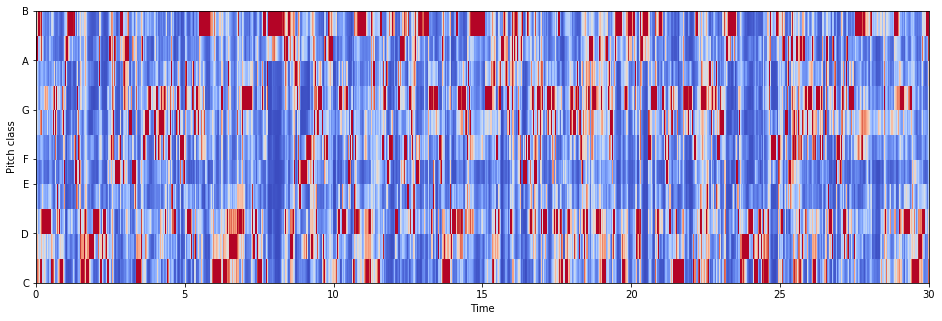

In [11]:
# Chroma Feature 

chromagram = librosa.feature.chroma_stft(y, sr=sr)
plt.figure(figsize=(16,5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')